# Advection Scheme

In [1]:
import advection_schemes
import advection_tests
import config
import animation
import matplotlib.pyplot as plt 

import numpy as np

c = config.generateConfig(dt=1e-4, t0=0)

def resetConfig(c):
    c["dt"] = 1e-3
    c["domainSize"] = 4
    c["xlim"] =  [0, 4]
    c["densityYlim"] = [0, 3]
    c["resolution"] = 256
    c["timeOrder"] = 1
    c["stencilOrder"] = 2
    c["dimension"] = 1
    c["debug"] = False
    c["slowDown"] = 1
    c["tEnd"] = 1
    c["gravity"] = 1
    c["outputTimestep"] = False
    c["alpha"] = 0.1
    c["useAdaptiveTimestep"] = True
    c["usePeriodicBC"] = False
    
resetConfig(c)


def run(title, scheme, c, test):
    solver = scheme(c, test)
    i = 0
    while (solver.t < solver.config["tEnd"]):
        solver.step(solver.getTimeStep())
        i += 1

    print(f"Finished in {i} steps.")
    #animation.createAnimation(solver, title, c, test, "stub")
    animation.drawFrame(solver, title, c, test, advection=True)
    plt.show()



## Tophat discontinuity

In [10]:
test = advection_tests.tophat1D
c["tEnd"] = 2.5

### Donor-Cell Scheme (Pure Upwinding, very diffusive)

Finished in 176 steps.


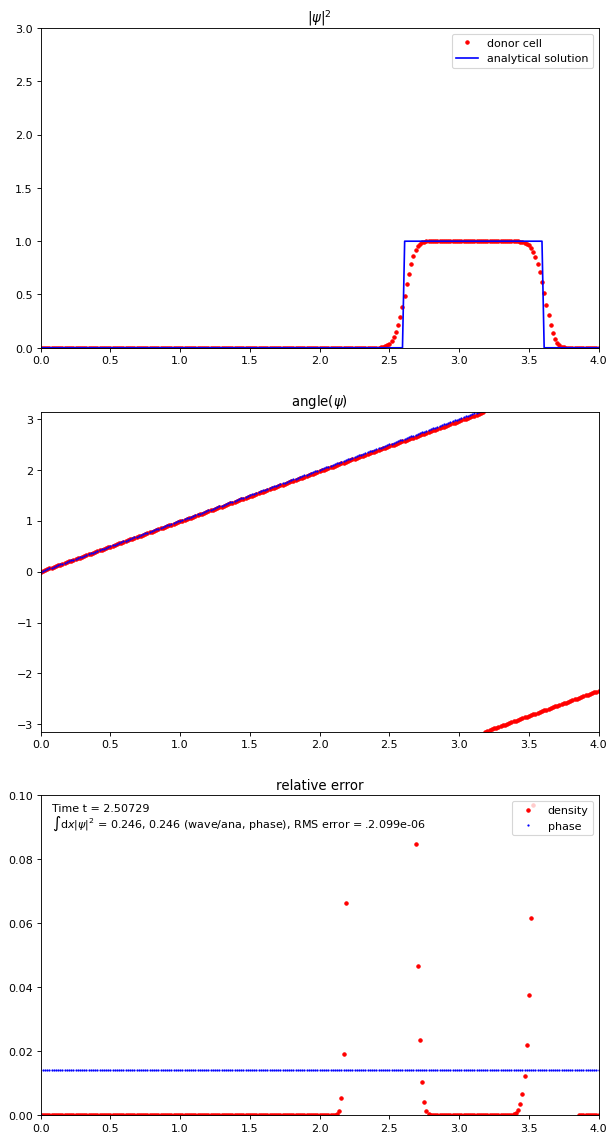

In [11]:
run("donor cell", advection_schemes.DonorCellScheme, c, test)

### Lax-Wendroff-Scheme (Less diffusive, but cannot handle discontinuities)

Finished in 178 steps.


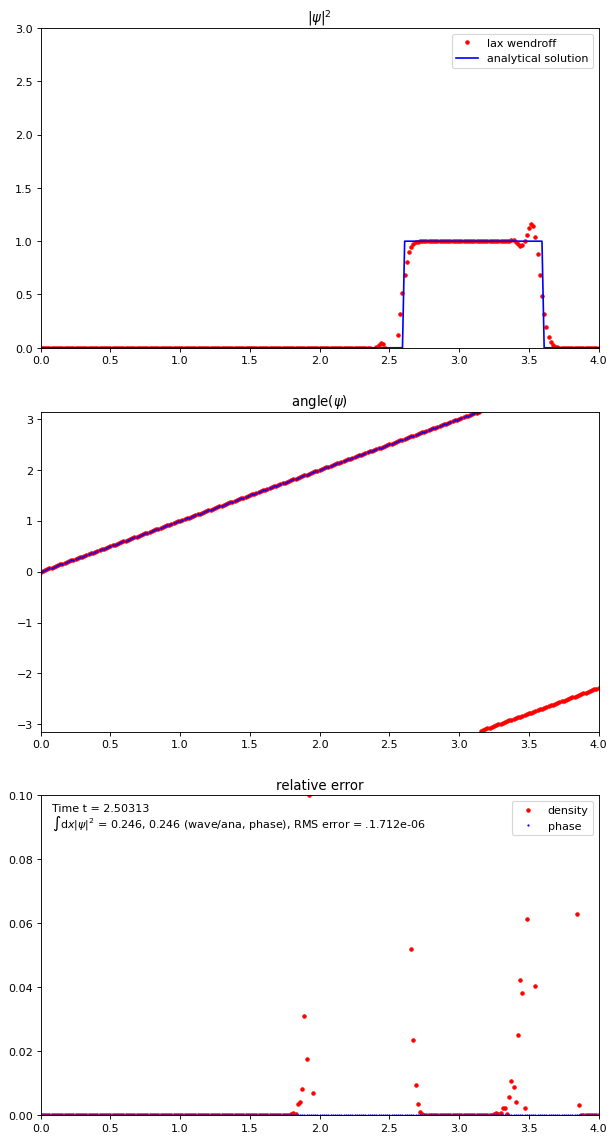

In [12]:
run("lax wendroff", advection_schemes.LaxWendroffScheme, c, test)

### MUSCL-scheme (Less diffusive, handles discontinuities via flux limiter)

Finished in 178 steps.


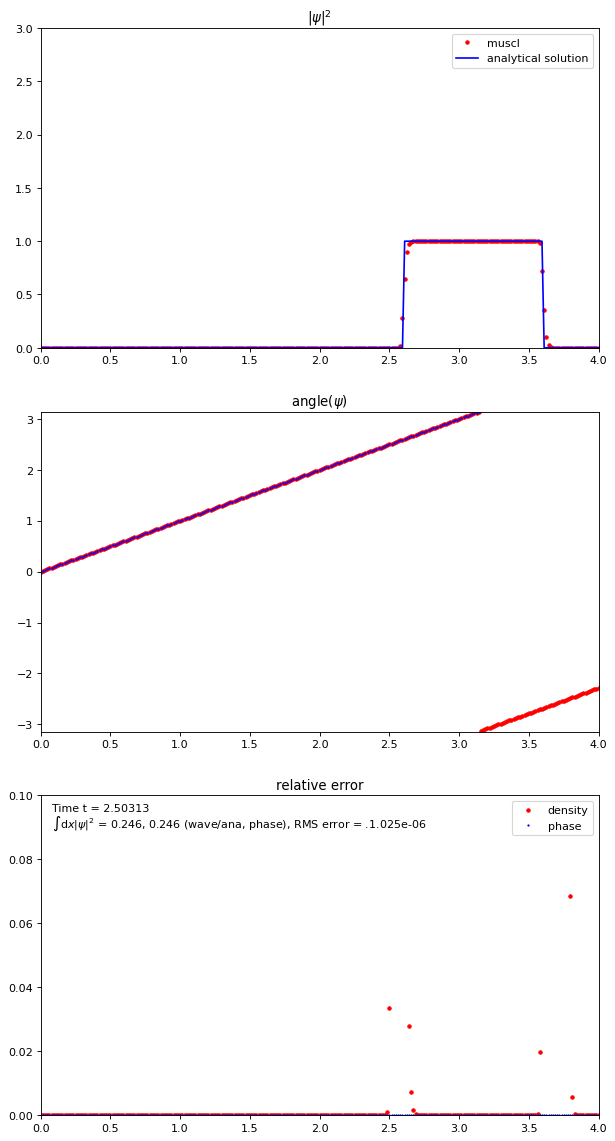

In [14]:
run("muscl", advection_schemes.MUSCLScheme, c, test)

### HO-FV with Lax-Friedrichs-Flux (No handling of discontinuities, works for stencilOrder = 1, but not higher)

/media/xerox/INTENSO/hybrid_scheme/advection_schemes.py:326: RuntimeWarning: overflow encountered in true_divide
  flux = (fp - fm) / self.dx
/media/xerox/INTENSO/hybrid_scheme/interpolation.py:49: RuntimeWarning: invalid value encountered in add
  f_rec += stencil[left_shift + int(p2), j] * np.roll(f, left_shift * L + R * j, axis = axis)
/media/xerox/INTENSO/hybrid_scheme/fd.py:273: RuntimeWarning: invalid value encountered in subtract
  result = rho_a * v_a + rho_b * v_b - alpha * (rho_b - rho_a)
/media/xerox/INTENSO/hybrid_scheme/fd.py:273: RuntimeWarning: overflow encountered in multiply
  result = rho_a * v_a + rho_b * v_b - alpha * (rho_b - rho_a)


Finished in 704 steps.


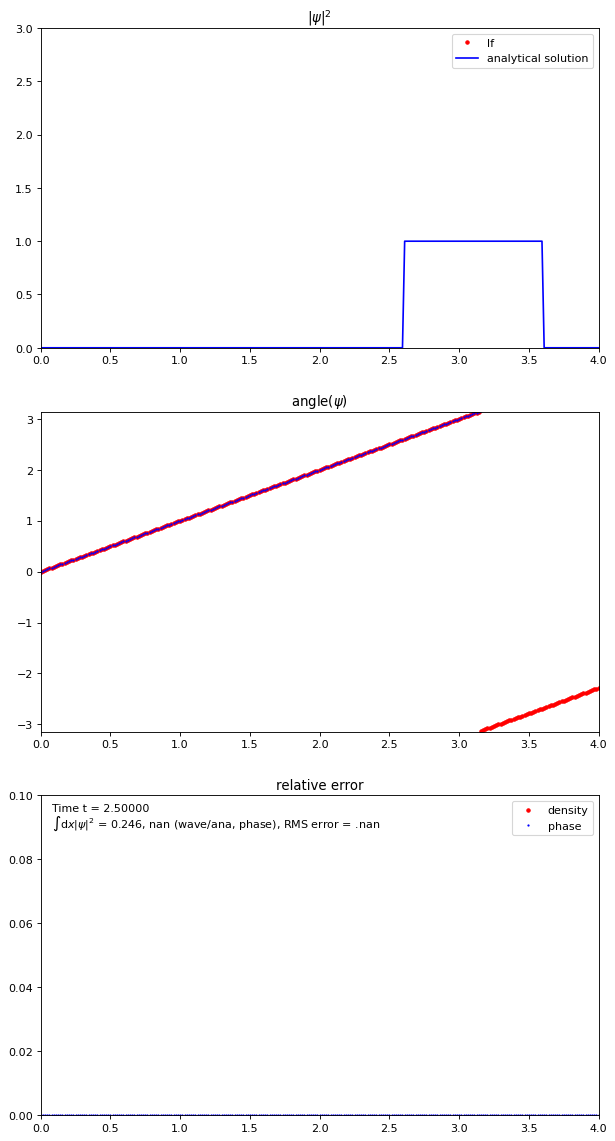

In [15]:
run("lf", advection_schemes.LaxFriedrichsScheme, c, test)

### ENO-Scheme (High order, handles discontinuities using local stencils)

#### First demonstrate ENO class

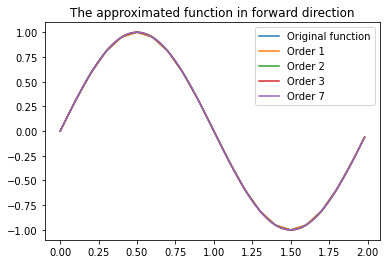

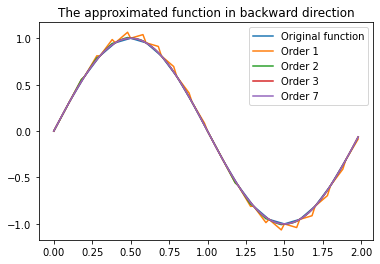

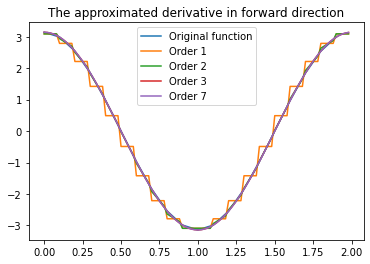

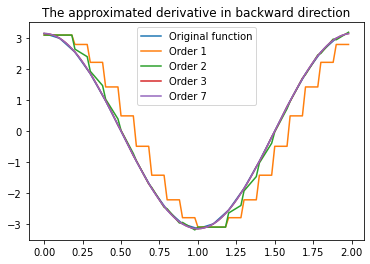

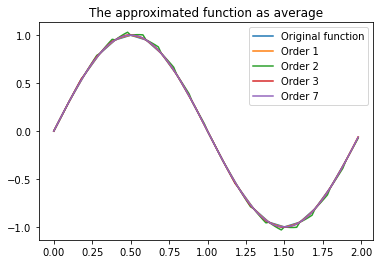

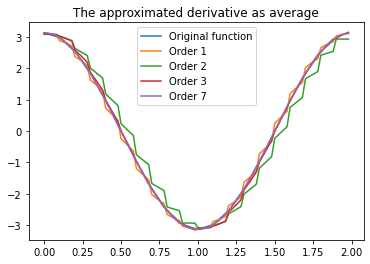

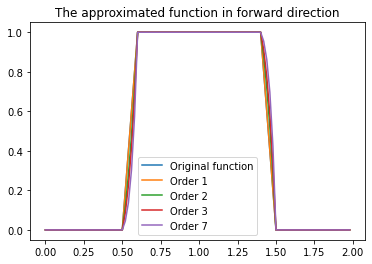

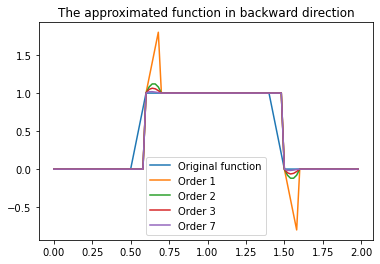

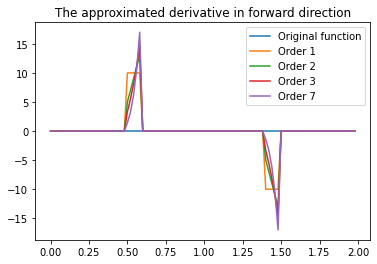

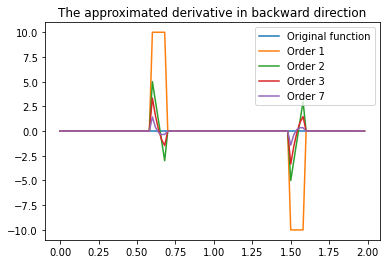

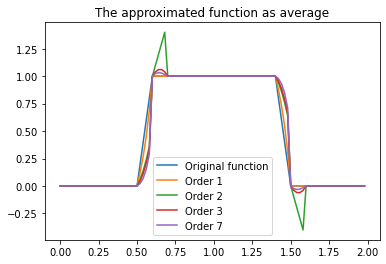

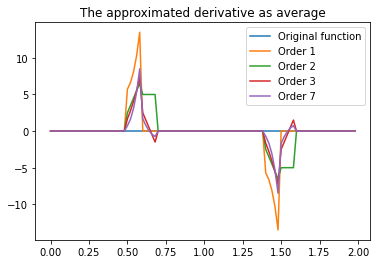

In [10]:
import eno 
import numpy as np 
xx    = np.linspace(0, 2.0, 21)
xx_HR = np.linspace(0, 2.0, 101)
eno.plotENO(xx, xx_HR, 2, lambda x: np.sin(x*np.pi), lambda x: np.pi*np.cos(x*np.pi))
eno.plotENO(xx, xx_HR, 2, lambda x: (np.abs(x-1) < 0.5).astype(float), lambda x: 0 * x)

#### Now show that ENO also works for higher order stencils, but is still quite diffusive (maybe use different flux?)

Finished in 178 steps.


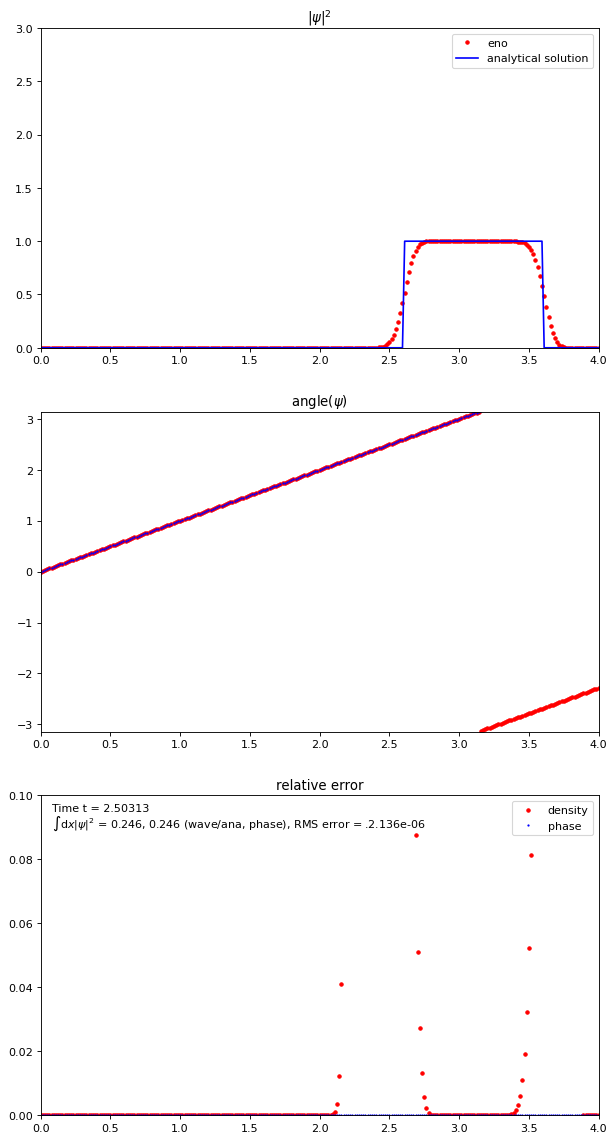

In [16]:
run("eno", advection_schemes.ENOScheme, c, test)

### SOU with limiter

Finished in 353 steps.


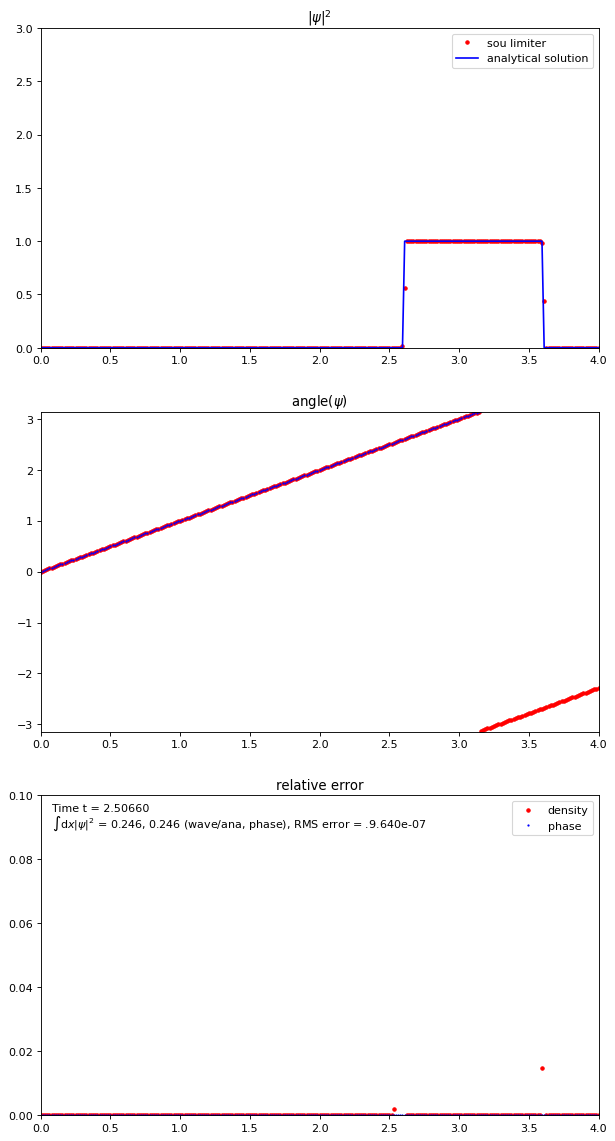

In [17]:
run("sou limiter", advection_schemes.SOLimiterScheme, c, test)

## Periodic test with time-dependent velocity field

In [8]:
test = advection_tests.periodic1D
c["densityYlim"] = [0., 4]
c["usePeriodicBC"] = True
c["xlim"] = [-0.1, np.pi * 2 + 0.1]
c["domainSize"] = 2 * np.pi
c["resolution"] = 1024
c["tEnd"] = np.pi
c["stencilOrder"] = 5

Finished in 381 steps.


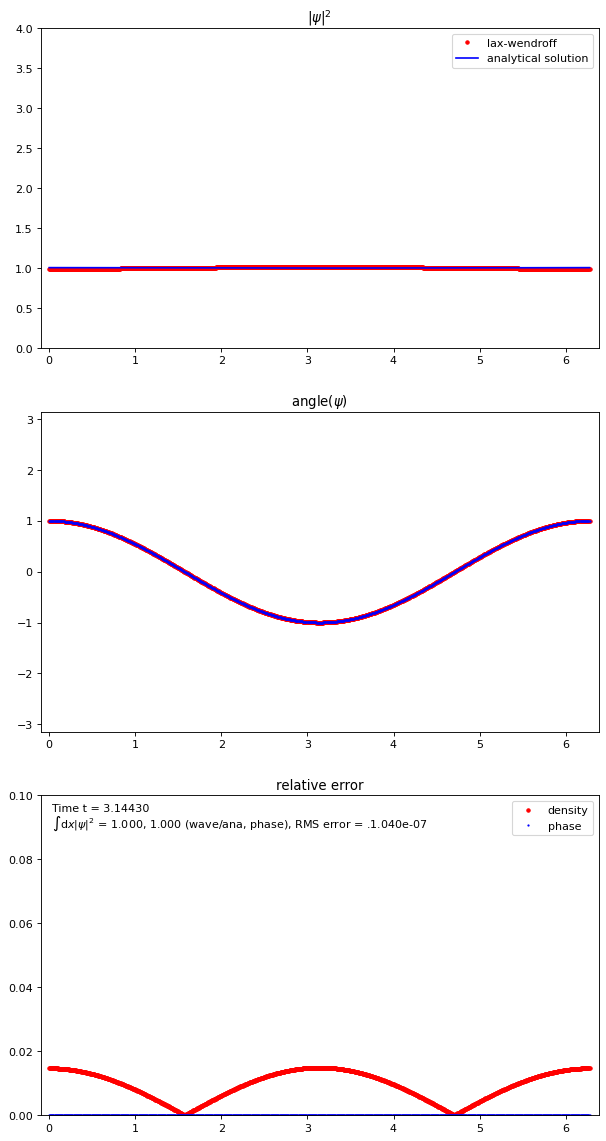

In [9]:
run("lax-wendroff", advection_schemes.LaxWendroffScheme, c, test)

Finished in 381 steps.


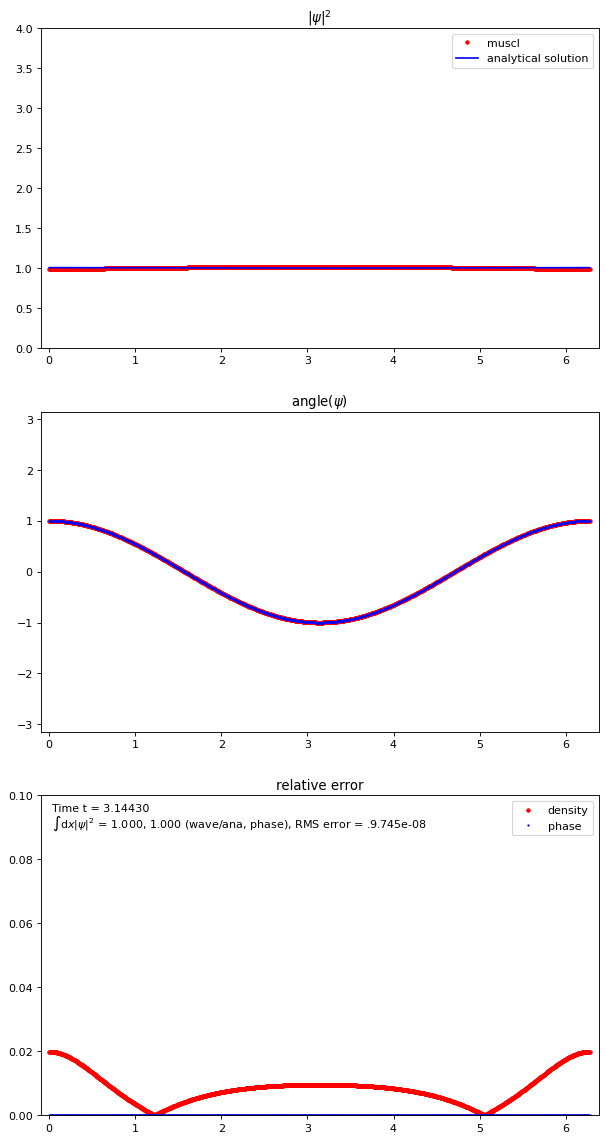

In [10]:
run("muscl", advection_schemes.MUSCLScheme, c, test)

Finished in 1509 steps.


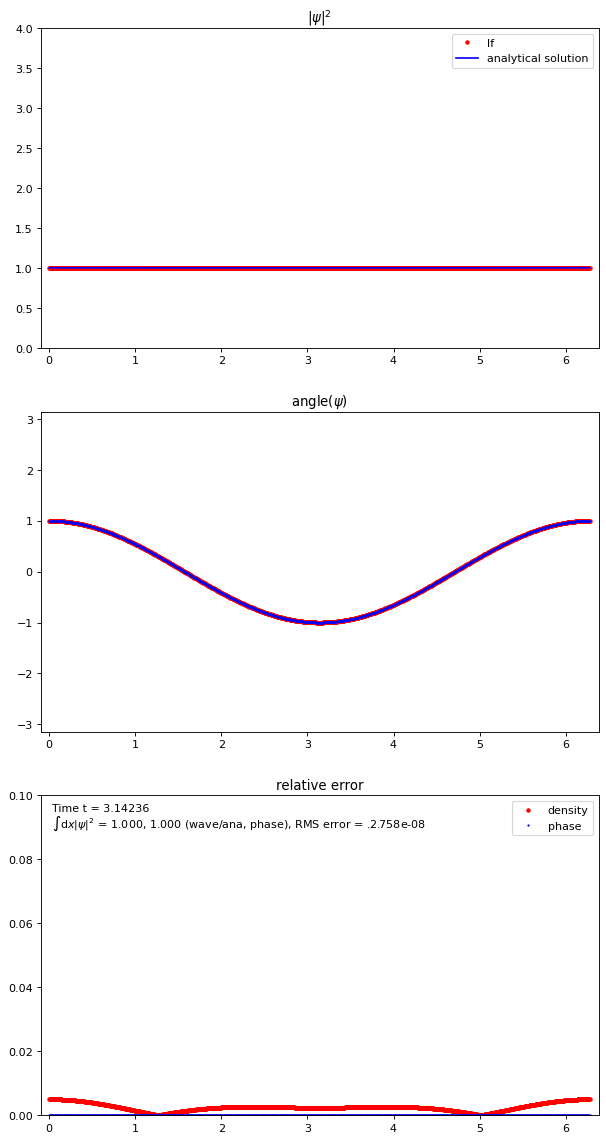

In [7]:
run("lf", advection_schemes.LaxFriedrichsScheme, c, test)